## Factorización de Matrices

Matemáticamente factorizar una matriz es encontrar un conjunto de dos o más matrices con algunas
propiedades cuyo producto sea nuestra matriz original.

Existen multitud de factorizaciones distintas usadas para distintos propósitos

Una factorización clásica es la descomposición en valores singulares o *SVD*
(*singular value decomposition*):

$$
{\large
A = U \Sigma V^T
}
$$
donde,

* $A$: Matriz original de dimensión $(m \times n)$
* $U$ y $V$: Matrices ortogonales de $(m \times \tau)$ y $(\tau \times n)$ respectivamente.
* $\Sigma$: Matriz diagonal de dimensión $(\tau\times\tau)$.

Un esquema gráfico de la descomposición: 

<center>
<img  src="../img/svd.png"></img>   
</center> <br>

Esta descomposición tiene algunas propiedades útiles
como por ejemplo la reducción de dimensionalidad. La matriz $\Sigma$ contiene
los valores singulares de mayor a menor, así que podemos quedarnos con una submatriz
de tamaño $(k \times k)$ por ejemplo y aunque estamos perdiendo información
(reduciendo la dimensionalidad) estamos desechando la parte "menos valiosa" de la matriz.

Veamos un ejemplo con una imagen del Greco.

Usando la librería `Pillow` vamos a proceder a leer una imagen en blanco y negro en formato *png*:

In [1]:
import numpy as np
from PIL import Image

In [2]:
greco = Image.open("../datos/greco.png")

In [3]:
type(greco)

PIL.PngImagePlugin.PngImageFile

Creamos una variable `size_show` con un tamaño más apropiado para pintar en el notebook y pintamos:

In [4]:
size_show = tuple((np.array(greco.size) * 0.5).astype(int))

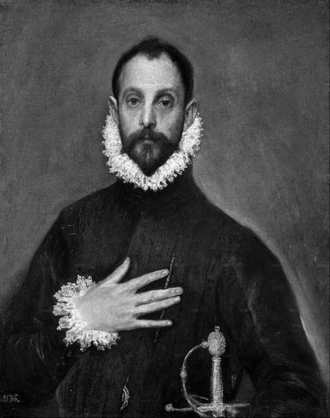

In [5]:
greco.resize(size_show)

In [6]:
greco_array = np.asarray(greco)

In [7]:
greco_array.shape

(836, 660)

In [8]:
print("## Dimensiones de `greco_array`: {}".format(greco_array.shape))

## Dimensiones de `greco_array`: (836, 660)


In [9]:
u, s, vh = np.linalg.svd(greco_array)
print("## Dimensiones de S: {}".format(u.shape))
print("## Dimensiones de V: {}".format(s.shape))
print("## Dimensiones de D: {}".format(vh.shape))

## Dimensiones de S: (836, 836)
## Dimensiones de V: (660,)
## Dimensiones de D: (660, 660)


In [10]:
greco_array_hat = (u[:, : len(s)] * s).dot(vh)

In [11]:
error = np.mean((greco_array - greco_array_hat) ** 2)

In [12]:
print("## El ECM es: {}".format(error))

## El ECM es: 4.953054963669203e-25


In [13]:
np.allclose(greco, np.dot(u[:, : len(s)] * s, vh))

True

Pintamos el resultado:

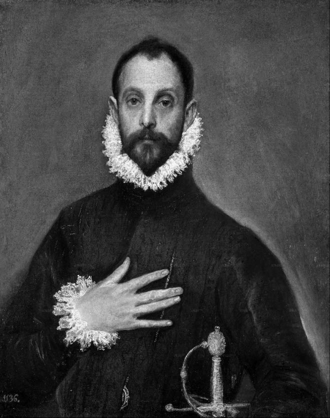

In [14]:
Image.fromarray(greco_array_hat.astype(np.uint8)).resize(size_show)

In [15]:
def reconstruir(k):
    return Image.fromarray(np.dot(u[:, :k] * s[:k], vh[:k, :]).astype(np.uint8))

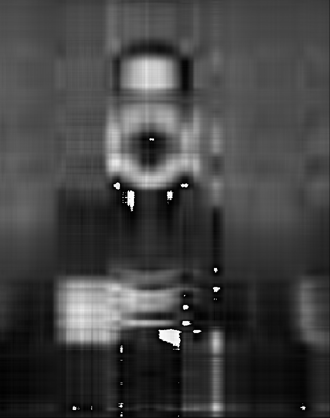

In [16]:
reconstruir(5).resize(size_show)

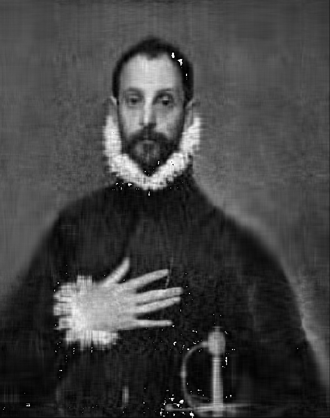

In [17]:
reconstruir(30).resize(size_show)

In [18]:
imagenes = [
    reconstruir(i).resize(size_show)
    # Malla esponencial para dar más valores de los pequeños
    for i in np.logspace(1, np.log2(len(s)), base=2, num=10, dtype=int)
]

In [19]:
(
    imagenes[0].save(
        "greco_reconstruccion.gif",
        format="GIF",
        append_images=imagenes[1:],
        save_all=True,
        duration=200,
        loop=0,
    )
)

![greco](./greco_reconstruccion.gif)

## Conclusión

Reducir la dimensionalidad de una matriz, nos ayuda a "ordenarla" y así poder "ver/detectar" patrones:

![](../img/dimensionality-reduction.jpg)